<a href="https://colab.research.google.com/github/rohitfattepur/Tensorflow/blob/master/SO_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Callbacks in model.fit
https://stackoverflow.com/questions/60808723/how-to-call-a-method-as-a-custom-callback-in-keras/60815917#60815917

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_6 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_7 (Activation)    (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)       

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 2/4
1088/1088 [==============================] - 1s 1ms/step - loss: 2.2246 - accuracy: 0.3300 - val_loss: 34.5585 - val_accuracy: 0.1287


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 3/4
1088/1088 [==============================] - 1s 1ms/step - loss: 1.7876 - accuracy: 0.4182 - val_loss: 6.3751 - val_accuracy: 0.1544


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 4/4
1088/1088 [==============================] - 1s 1ms/step - loss: 1.5633 - accuracy: 0.5074 - val_loss: 2.7399 - val_accuracy: 0.2426


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Total number of epochs run: 4
Gradient Array has the shape: (4, 34)


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)

ERROR! Session/line number was not unique in database. History logging moved to new session 62
conv2d_21 (11, 11, 3, 96)
conv2d_22 (11, 11, 96, 256)
conv2d_23 (3, 3, 256, 384)
conv2d_24 (3, 3, 384, 384)
conv2d_25 (3, 3, 384, 256)


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()

print(filters.shape)
print(filters)

# Tensor to Array(ndarray) 
https://stackoverflow.com/questions/60824788/how-to-convert-tensor-to-ndarray

In [0]:
#!pip install tensorflow==2.1

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))
print("Output as a Tensor:",output)

out = np.array(output)
print("Output as an Array:",out)
print("Type of the Array:",type(out))

tensorflow version: 2.1.0
Output as a Tensor: tf.Tensor([[-0.40550372]], shape=(1, 1), dtype=float32)
Output as an Array: [[-0.40550372]]
Type of the Array: <class 'numpy.ndarray'>


In [0]:
#!pip install tensorflow==1.14

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

#initialize the variable
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    print("Output as a Tensor:",output)
    out = np.array(sess.run(output))
    print("Output as an Array:",out)
    print("Type of the Array:",type(out)

tensorflow version: 1.14.0
Output as a Tensor: Tensor("sequential_7/dense_15/BiasAdd:0", shape=(1, 1), dtype=float32)
Output as an Array: [[-0.29746282]]
Type of the Array: <class 'numpy.ndarray'>


# Switching between Tensorflow Versions without installing everytime
https://stackoverflow.com/questions/60810400/how-to-upgrade-tensorflow-to-2-0-in-google-colab-permanently/60810715#60810715

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


# One Hot Encoding Using LabelBinarizer
https://stackoverflow.com/questions/60868391/how-to-view-class-labels-after-one-hot-encoding-during-training-testing-and-afte/60871869#60871869

In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values = np.array(data)

#Binary encode
lb = LabelBinarizer()

labels = lb.fit_transform(values)
labels = to_categorical(labels)
print("which position represents for cat and dog?:")
print("Data is:",data)
print(labels)

which position represents for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data1 = ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
data2 = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values1 = np.array(data1)
values2 = np.array(data2)

#Binary encode
lb = LabelBinarizer()

labels1 = lb.fit_transform(values1)
labels1 = to_categorical(labels1)
print("what is value for cat and dog?:")
print("Data is:",data1)
print(labels1)
print("\n")

labels2 = lb.fit_transform(values2)
labels2 = to_categorical(labels2)
print("what is value for cat and dog?:")
print("Data is:",data2)
print(labels2)

what is value for cat and dog?:
Data is: ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


what is value for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
rslt = np.array([[0.9550967,0.04490325]])
rslt = np.argmax(rslt)
print(rslt)

0


In [0]:
import numpy as np
rslt = np.array([[0.04490325,0.9550967, 1]])
rslt = np.argmax(rslt)
print(rslt)

2


# Ragged Tensor
https://stackoverflow.com/questions/60924624/is-there-a-way-to-normalize-a-ragged-tensor

## Using math.l2_normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.math.l2_normalize(rt, axis = None)
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 <tf.RaggedTensor [[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]]> 

Tensor of same length: 
 tf.Tensor(
[[9. 8. 7.]
 [0. 0. 0.]
 [6. 5. 0.]
 [4. 0. 0.]], shape=(4, 3), dtype=float32) 

Normalized Tensor: 
 tf.Tensor(
[[0.546711   0.48596537 0.4252197 ]
 [0.         0.         0.        ]
 [0.36447403 0.30372834 0.        ]
 [0.24298269 0.         0.        ]], shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 <tf.RaggedTensor [[0.5467110276222229, 0.485965371131897, 0.42521971464157104], [], [0.36447402834892273, 0.3037283420562744], [0.2429826855659485]]>


## Using tf.linalg.normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.linalg.normalize(rt, axis = None)
print("Normalized and Norm Tensor:","\n",rt,"\n")
# Get the normalized part
rt = tf.convert_to_tensor(rt[0])
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedConstant/values:0", shape=(6,), dtype=float32), row_splits=Tensor("RaggedConstant/Const:0", shape=(5,), dtype=int64)) 

Tensor of same length: 
 Tensor("RaggedToTensor/GatherV2:0", shape=(4, 3), dtype=float32) 

Normalized and Norm Tensor: 
 (<tf.Tensor 'normalize/truediv:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'normalize/norm/Sqrt:0' shape=(1, 1) dtype=float32>) 

Normalized Tensor: 
 Tensor("normalize/truediv:0", shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedFromTensor/boolean_mask/GatherV2:0", shape=(?,), dtype=float32), row_splits=Tensor("RaggedFromTensor/concat:0", shape=(5,), dtype=int64))


# Deleting Layer using Keras Surgeon OR pop
https://stackoverflow.com/questions/60637199/error-in-removing-the-first-layer-of-keras-model

## Deleting the first or middle layer

In [0]:
!pip install kerassurgeon

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon.operations import delete_layer, insert_layer, delete_channels
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
model = delete_layer(model, layer_3)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_7 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_27 (Dense)             (None, 100)              

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
surgeon = Surgeon(model)
surgeon.add_job('delete_layer', layer_3)
model = surgeon.operate()

model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               600       
___________________________________________

ValueError: ignored

In [0]:
# (1) Importing dependency
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

model1 = model.layers.pop(0)

model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_55 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_56 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)       

AttributeError: ignored

## To remove the last layer

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

from keras.models import Model

model._layers.pop()

new_model = Model(model.input,model.layers[-1].output)

new_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_42 (Flatten)         (None, 9600)              0         
_________________________________________________________________
dense_165 (Dense)            (None, 5)                 48005     
_________________________________________________________________
dense_166 (Dense)            (None, 100)               600       
_________________________________________________________________
dense_167 (Dense)            (None, 100)             

# Multiple image input for keras application
https://stackoverflow.com/questions/60582442/multiple-image-input-for-keras-application/60968842#60968842

In [0]:
import tensorflow
from tensorflow.python.keras import layers, models, applications

# Multiple inputs
in1 = layers.Input(shape=(128,128,3))
in2 = layers.Input(shape=(128,128,3))
in3 = layers.Input(shape=(128,128,3))

# CNN output
cnn = applications.xception.Xception(include_top=False)
cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = layers.Flatten()(out1)
fout2 = layers.Flatten()(out2)
fout3 = layers.Flatten()(out3)

# Getting the dense output
dense = layers.Dense(100, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = layers.Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = models.Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.activations import relu

input_shape = (32,32,3)
#[(None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3)]
#rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])

in1 = Input(shape=(32,32,3))
in2 = Input(shape=(32,32,3))
in3 = Input(shape=(32,32,3))
in4 = Input(shape=(32,32,3))
in5 = Input(shape=(32,32,3))
in6 = Input(shape=(32,32,3))
in7 = Input(shape=(32,32,3))
in8 = Input(shape=(32,32,3))
in9 = Input(shape=(32,32,3))
in10 = Input(shape=(32,32,3))
in11 = Input(shape=(32,32,3))

inputs = [in1,in2,in3,in4,in5,in6,in7,in8,in9,in10,in11]
densenet_121_model = DenseNet121(include_top=False)(inputs)
output = Dense(units=11, activation='relu')(densenet_121_model)

model = Model(inputs=inputs, outputs=output)

ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, Flatten, Concatenate
from keras.activations import relu

# Multiple inputs
in1 = Input(shape=(128,128,3))
in2 = Input(shape=(128,128,3))
in3 = Input(shape=(128,128,3))

# CNN output
cnn = DenseNet121(include_top=False)
#cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = Flatten()(out1)
fout2 = Flatten()(out2)
fout3 = Flatten()(out3)

# Getting the dense output
dense = Dense(1, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_306 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_307 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_308 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
densenet121 (Model)             multiple             7037504     input_306[0][0]                  
               

# Padding = Same and Padding = Valid 
https://stackoverflow.com/questions/60323897/tensorflow-keras-conv2d-layers-with-padding-same-behave-strangely

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Same'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 2, 2, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(6,6,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


# model.fit_generator Plot
https://stackoverflow.com/questions/60306753/drawing-the-accuracy-of-multiple-validation-of-diffferent-cnn-classifiers

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

lr=0.01

for i in range(5):

    adam = Adam(lr)

    print("Model using learning rate of",lr)

    lr = lr + 0.01

    model.compile(optimizer=adam, 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(100 * history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR=0.01', 'LR=0.02', 'LR=0.03', 'LR=0.04', 'LR=0.05'], loc='upper left')
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

for i in range(7):

    print("Model using",optimizer[i],"optimizer")

    model.compile(optimizer=optimizer[i], 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(history.history['val_accuracy'])

plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')
plt.show()

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model using SGD optimizer
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
15/15 [==============================] - 55s 4s/step - loss: 0.6927 - acc: 0.5032 - val_loss: 0.6918 - val_acc: 0.5056
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 0.6911 - acc: 0.4995 - val_loss: 0.6911 - val_acc: 0.5056
Epoch 3/15
15/15 [==============================] - 54s 4s/step - loss: 0.6895 - acc: 0.4931 - val_loss: 0.6904 - val_acc: 0.5056
Epoch 4/15
15/15 [==============================] - 55s 4s/step - loss: 0.6896 - acc: 0.4911 - val_loss: 0.6903 - val_acc: 0.5056
Epoch 5/15
15/15 [==============================] - 53s 4s/step - loss: 0.6896 - acc: 0.5134 - val_loss: 0.6885 - val_acc: 0.5056


KeyError: ignored

# Visualizing the Conv3D and Conv2D Kernel and Visualizing the Filters
https://stackoverflow.com/questions/60456336/weight-visualization-of-3d-convolutional-kernel

Interesting Read that helps in visualizing the image after every layer - https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Params of a layer -
“(n* m * l+1)*k”
- The filter size is “n*m”.
- “l” feature maps as the input 
- “k” feature maps as output


## Conv3D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
x = np.expand_dims(x,-1)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv3D(filters=2, input_shape=(224,224,3,1), kernel_size=(3,3,3), strides=(4,4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv3D(filters=4, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv3D(filters=2, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x, y, batch_size=64, epochs= 4, verbose=1, validation_split=0.2, shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 56, 56, 1, 2)      56        
_________________________________________________________________
activation_33 (Activation)   (None, 56, 56, 1, 2)      0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 56, 56, 1, 4)      516       
_________________________________________________________________
activation_34 (Activation)   (None, 56, 56, 1, 4)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 56, 56, 1, 2)      514       
_________________________________________________________________
activation_35 (Activation)   (None, 56, 56, 1, 2)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [0]:
import numpy as np
x = model.layers[4].kernel

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(x))

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(biases)

conv3d_1 (3, 3, 3, 1, 2)
conv3d_2 (4, 4, 4, 2, 4)
conv3d_3 (4, 4, 4, 4, 2)


### To print Color Image

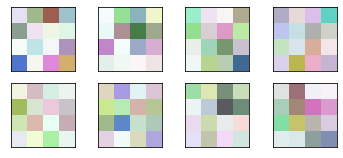

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
			# specify subplot and turn of axis
			ax = pyplot.subplot(3, incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, :,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

### To print Gray scale image

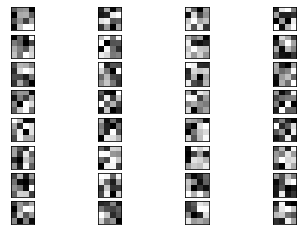

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
		# Range of Depth of the kernel .i.e. 3
		Depth = 4
		for k in range(Depth):
			# specify subplot and turn of axis
			ax = pyplot.subplot((outgoing_channels*Depth), incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, k,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

## Conv2D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=2, input_shape=(224,224,3), kernel_size=(3,3), strides=(4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=2, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 2)         56        
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 4)         76        
_________________________________________________________________
activation_2 (Activation)    (None, 56, 56, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 2)         74        
_________________________________________________________________
activation_3 (Activation)    (None, 56, 56, 2)         0      

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 2/4
1088/1088 [==============================] - 1s 567us/step - loss: 2.7434 - acc: 0.2426 - val_loss: 2.7336 - val_acc: 0.1250


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 3/4
1088/1088 [==============================] - 1s 579us/step - loss: 2.2730 - acc: 0.4384 - val_loss: 2.4033 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 4/4
1088/1088 [==============================] - 1s 555us/step - loss: 1.3170 - acc: 0.6884 - val_loss: 2.2917 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Total number of epochs run: 4
Gradient Array has the shape: (4, 10)


In [0]:
import numpy as np
x = model.layers[4].kernel
gr = tf.get_default_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv1_kernel_val = gr.get_tensor_by_name('conv1/kernel:0').eval()
    print(sess.run(x))

[[[[-0.07628679  0.31725606]
   [-0.29280648  0.10707554]
   [-0.1409379  -0.14117424]
   [-0.04934797 -0.17769067]]

  [[-0.22811215  0.2088342 ]
   [ 0.12845007 -0.10234594]
   [ 0.29518536  0.22939327]
   [-0.102254   -0.16633217]]

  [[ 0.23566589  0.06252447]
   [ 0.12485743 -0.2845057 ]
   [ 0.17910227 -0.09911792]
   [ 0.09142479 -0.17152238]]]


 [[[-0.23811015 -0.16541886]
   [-0.33333215 -0.13665256]
   [ 0.09643212  0.07662854]
   [ 0.05305314 -0.23696613]]

  [[ 0.0339109   0.16784325]
   [-0.04169551 -0.0482665 ]
   [ 0.08657351  0.12973014]
   [ 0.05880824  0.05947757]]

  [[ 0.11017862 -0.14729127]
   [ 0.2464253  -0.19549426]
   [-0.2609269   0.25060275]
   [-0.26333413 -0.13276713]]]


 [[[-0.06246376  0.0363799 ]
   [-0.02949128  0.32878068]
   [ 0.15073076 -0.30452785]
   [-0.24252614 -0.09735529]]

  [[ 0.23945466  0.01562142]
   [ 0.22383246  0.09923801]
   [-0.2536789  -0.09304142]
   [-0.22144732  0.3057051 ]]

  [[ 0.05687061 -0.2811746 ]
   [-0.2436115  -0.1616

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(filters[:,:,:,0])

conv2d_4 (3, 3, 3, 2)
conv2d_5 (3, 3, 2, 4)
conv2d_6 (3, 3, 4, 2)


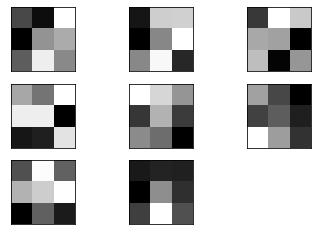

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing filters
n_filters, ix = 2, 1 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	#print(f)
	# plot each channel separately
	# Range of incoming filters
	for j in range(4):
		# specify subplot and turn of axis
		ax = pyplot.subplot(3, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
	  #print(f[:, :, j])
		ix += 1
# show the figure
pyplot.show()

## Visualizing the Filters


553467904/553467096 [==============================] - 12s 0us/step


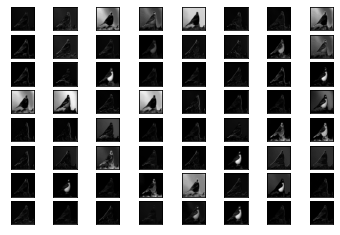

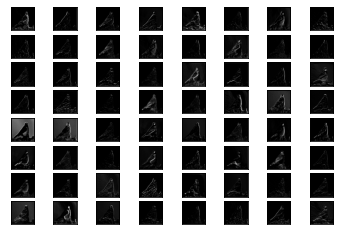

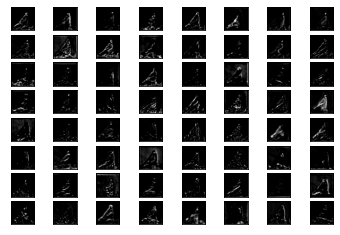

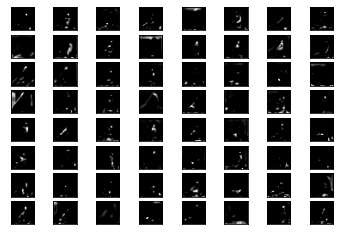

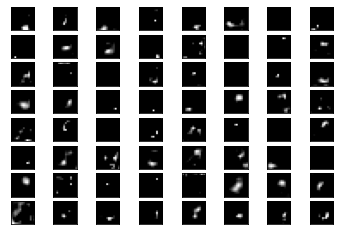

In [0]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('/content/bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

# Tensorflow Reduce_max
https://stackoverflow.com/questions/60277848/tensorflow-reduce-max-for-different-dimensions

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Create a Ragged Tensor of variable length
rt = tf.ragged.constant([[9, 8, 7], [], [6, 5], [4]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Apply reduce_max to get the max value along axis=1
rt = tf.reduce_max(rt, axis=1)
print("Reduce Max Tensor:","\n",rt,"\n")

Ragged Tensor: 
 <tf.RaggedTensor [[9, 8, 7], [], [6, 5], [4]]> 

Tensor of same length: 
 tf.Tensor(
[[9 8 7]
 [0 0 0]
 [6 5 0]
 [4 0 0]], shape=(4, 3), dtype=int32) 

Reduce Max Tensor: 
 tf.Tensor([9 0 6 4], shape=(4,), dtype=int32) 



# Save and Load Model using Keras
https://stackoverflow.com/questions/60198878/proper-way-to-save-model-in-keras

Good Article for Load and Save in Keras - https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## Build and Save the Model

In [0]:
%tensorflow_version 2.x
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
#model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

TensorFlow is already loaded. Please restart the runtime to change versions.
accuracy: 75.39%
Saved model to disk


## Load the Model

In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')

# summarize model.
model.summary()

# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 75.78%


# Feed Dict Example


In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = x * 42

with tf.Session() as sess:
  train_accuracy = y.eval(session=sess,feed_dict={x: (2, 4)})
  print(train_accuracy)

[ 84. 168.]


# Dealing with Session Error Explained
https://stackoverflow.com/questions/61006702/cannot-use-the-given-session-to-evaluate-tensor-the-tensors-graph-is-different

## Simple Error and Fix 

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


## Error and Fix Explained in Detail

### Error with default session and using variable created in another graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, but it is evaluated in
                  # session s which is tied to graph g => ERROR

2.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph and also session=sess

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Fix with default session and variable not assigned to any graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.constant(1.0)  # x is in not assigned to any graph

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x not assigned to any graph, and is evaluated in
                  # default session, so everything is ok.  

2.0
1.0


### The best fix is to cleanly separate the construction phase and the execution phase

In [0]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


# softmax, log_softmax and sigmoid
https://stackoverflow.com/questions/59129169/some-clarification-about-what-an-image-recognition-cnn-should-return-on-predicti/61389763#61389763


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
x = tf.nn.softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])
y = tf.nn.log_softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])

x1 = tf.nn.softmax([1.0, 2.0, 3.0, 4.0, 5.0])
y1 = tf.nn.log_softmax([1.0, 2.0, 3.0, 4.0, 5.0])

with tf.Session() as sess:
   print(x.eval())
   print(y.eval())
   print(x1.eval())
   print(y1.eval())   

[0.20027274 0.24514017 0.22404124 0.12782091 0.20272495]
[-1.6080751 -1.4059252 -1.4959252 -2.057125  -1.5959052]
[0.01165623 0.03168492 0.08612854 0.23412165 0.6364086 ]
[-4.4519143 -3.4519143 -2.4519143 -1.4519144 -0.4519144]


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np

# Assume below is the input to last layer
Input = tf.constant(np.array([[0.1, 0.3, 0.5, 1.5]]))

with tf.Session() as sess:
   # Computes softmax activations. softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
   # Output sums upto 1, as this is the probability
   print(tf.nn.softmax(Input).eval()) 

   # Computes log softmax activations.For each batch i and class j we have logsoftmax = logits - log(reduce_sum(exp(logits), axis))
   # Gives log(softmax(input)) as output which is log likelihood and value doesn't sum up to 1.
   print(tf.nn.log_softmax(Input).eval()) 

   # Manual computation of log_softmax
   a = tf.nn.softmax(Input).eval()
   b = np.array(a)
   print(np.log(b))

   # Computes sigmoid of x element-wise. Specifically, y = 1 / (1 + exp(-x)).
   print(tf.nn.sigmoid(Input).eval())  

[[0.12872618 0.15722651 0.1920369  0.52201041]]
[[-2.05006775 -1.85006775 -1.65006775 -0.65006775]]
[[-2.05006775 -1.85006775 -1.65006775 -0.65006775]]
[[0.52497919 0.57444252 0.62245933 0.81757448]]


# Tensor to array
https://stackoverflow.com/questions/59875172/typeerror-when-trying-to-use-earlystopping-with-f1-metric-as-stopping-criterion

In [0]:
%tensorflow_version 1.x
print(tf.__version__)
import tensorflow as tf
import numpy as np

x = tf.constant([1,2,3,4,5,6])
print("Type of x:",x)

with tf.Session() as sess:
  y = np.array(x.eval())
  print("Type of y:",y.shape,y)

1.15.2
Type of x: Tensor("Const_24:0", shape=(6,), dtype=int32)
Type of y: (6,) [1 2 3 4 5 6]


# Fit_generator simple example.

https://stackoverflow.com/questions/59417210/keras-losing-axis-with-brightness-range-during-image-augmentation


Also example on hanling list. You can find it during Visualization where I have mulitplied list value by 100.

https://stackoverflow.com/questions/61080410/cnn-accuracy-y-axis-range

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 10s 689ms/step - loss: 0.9475 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 2/15
15/15 [==============================] - 11s 700ms/step - loss: 0.6876 - accuracy: 0.5021 - val_loss: 0.6813 - val_accuracy: 0.4955
Epoch 3/15
15/15 [==============================] - 11s 733ms/step - loss: 0.6599 - accuracy: 0.5529 - val_loss: 0.6421 - val_accuracy: 0.6105
Epoch 4/15
15/15 [==============================] - 11s 748ms/step - loss: 0.6041 - accuracy: 0.6480 - val_loss: 0.6185 - val_accuracy: 0.6920
Epoch 5/15
15/15 [==============================] - 10s 697ms/step - loss: 0.5682 - accuracy: 0.6843 - val_loss: 0.6029 - val_accuracy: 0.6540
Epoch 6/15
15/15 [==============================] - 11s 707m

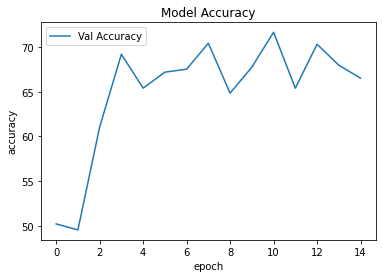

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer="adam", 
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=total_train // batch_size,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size)

val_accuracy = [i * 100 for i in history.history['val_accuracy']]
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Val Accuracy'], loc='upper left')
plt.show()

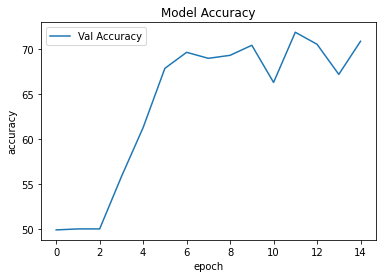

In [0]:
val_accuracy = [i * 100 for i in history.history['val_accuracy']]
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Val Accuracy'], loc='upper left')
plt.show()

# Convert Functional Model to Sequential and Vice Versa
https://stackoverflow.com/questions/61130836/convert-functional-model-to-sequential-keras

## User Code has one functional model and another sequential model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(128, 128,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, (3, 3), activation='sigmoid', padding='same')(x)

#compile and run

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)
encoder.save('Encoded.h5')

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

#load in data using imagedatagenreator
x = load_model('Encoded.h5')
x.summary()

model = Sequential()
model.add(encoded)
model.add(Conv2D(64,(3,3), input_shape=(424,424,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 16, 16, 8)         0   

TypeError: ignored

## Convert functional model to sequential model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

# Create the Sequential Model
model = Sequential()
model.add(Convolution2D(16, (3, 3), input_shape=(424,424,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Model summary
model.summary()

# Save the Model and Architecture
model.save('Encoded.h5')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
Total params: 2,192
Trainable params: 2,192
Non-trainable params: 0
____________________________________________________

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
model = load_model('Encoded.h5')

# Add the additonal layers 
model.add(Conv2D(64,(3,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 51, 51, 64)       

## Convert sequential model to functional model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(424,424,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)

# Model Summary
encoder.summary()

encoder.save('Encoded.h5')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 53, 53, 8)         0   

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
load_model('Encoded.h5')

# Add the additonal layers 
x = Convolution2D(64,(3,3), activation='relu')(encoded)#3x3 is default
x = MaxPooling2D(pool_size=(3,3))(x)
#model.add(Dropout(.1))#test
x = Dense(32, activation='relu')(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.3)(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(.3)(x)
x = Flatten(input_shape=(424,424,3))(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax')(x)

##save weights and and model start conv network with these weights
model = Model(input_img, output)

# Model summary 
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 53, 53, 8)         0   

# Custom Loss Function Example
https://stackoverflow.com/questions/59415275/custom-metric-in-multi-output-keras-model

In [0]:
import numpy as np

# Define custom loss
# Create a loss function that adds the MSE loss to the mean of all squared activations
def custom_loss(y_pred1, y_true1, y_pred2, y_true2):
    Loss = 0

    def loss1(y_true1,y_pred1):
        return np.square(np.subtract(y_true1,y_pred1)).mean()

    def loss2(y_true2,y_pred2):
        return np.square(np.subtract(y_true2,y_pred2)).mean()

    def finalloss(y_pred1, y_true1, y_pred2, y_true2):
        Loss = loss1(y_pred1, y_true1) + loss2(y_pred2, y_true2)
        if(y_pred1 == y_true1 and y_pred2 == y_true2):
           return(0)
        elif(y_pred1 == y_true1 and y_pred2 != y_true2):
            return(0.5 * Loss)
        elif(y_pred1 != y_true1 and y_pred2 == y_true2):
            return(0.5 * Loss)    
        else:
            return(Loss)
    
    return finalloss(y_pred1, y_true1, y_pred2, y_true2)

In [0]:
custom_loss(1,1,7,2)

12.5

# Layer Concatentation
https://stackoverflow.com/questions/59470195/how-to-achieve-elementwise-convolution-for-two-tensors-using-tensorflow/61206149#61206149

In [0]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, ZeroPadding2D
from keras.optimizers import Adagrad
import tensorflow.keras.backend as K
import tensorflow as tf

input_img1 = Input(shape=(44,44,3))
x1 = Conv2D(3, (3, 3), activation='relu', padding='same')(input_img1)

input_img2 = Input(shape=(34,34,3))
x2 = Conv2D(3, (3, 3), activation='relu', padding='same')(input_img2)
# Zero Padding of 5 at the top, bottom, left and right side of an image tensor
x3 = ZeroPadding2D(padding = (5,5))(x2)

# Concatenate works as layers have same size output
x4 = concatenate([x1,x3])

output = Dense(18, activation='relu')(x4)

model = Model(inputs=[input_img1,input_img2], outputs=output)

model.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_91 (InputLayer)           (None, 34, 34, 3)    0                                            
__________________________________________________________________________________________________
input_90 (InputLayer)           (None, 44, 44, 3)    0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 34, 34, 3)    84          input_91[0][0]                   
__________________________________________________________________________________________________
conv2d_72 (Conv2D)              (None, 44, 44, 3)    84          input_90[0][0]                   
___________________________________________________________________________________________

In [0]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

first_input = Input(shape=(5, ))
first_dense = Dense(8, )(first_input)

second_input = Input(shape=(2, ))
second_dense = Dense(1, )(second_input)

merge_one = concatenate([first_dense, second_dense])

third_input = Input(shape=(1, ))
merge_two = concatenate([merge_one, third_input])

model = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
model.summary()
ada_grad = Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer=ada_grad, loss='binary_crossentropy',
               metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 8)            48          input_21[0][0]                   
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1)            3           input_22[0][0]                   
____________________________________________________________________________________________

# Simple CNN Model
https://stackoverflow.com/questions/59211403/find-the-output-node-in-a-alexnet-implementation-in-tensorflow

In [0]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model


# Add the layers 
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(424,424,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(32, activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 422, 422, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 140, 140, 64)      0         
_________________________________________________________________
dense_3 (Dense)              (None, 140, 140, 32)      2080      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 138, 138, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 46, 46, 64)      

In [0]:
# To print all the layers of the Model
print("All the Layers of the Model:")
for layers in model.layers:
    print(layers)
print("\n")

# To print first layer OR Input layer of the Model
print("Input Layer of the Model:","\n",model.layers[0],"\n")

# To print last layer OR Output layer of the Model
print("Output Layer of the Model:","\n",model.layers[-1])

All the Layers of the Model:


Input Layer of the Model: 

Output Layer of the Model: 


# Build, Save and Load the Model using Tensorflow
https://stackoverflow.com/questions/57320623/how-to-load-a-pre-trained-cnn-model-in-tensorflow-and-test-the-results-with-unkn

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 75.00%
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.h5py/assets
Saved model to disk


In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5py')

# summarize model
model.summary()

# LOAD THE NEW DATASET HERE
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 75.00%


# Callbacks with Kernel Visualization for Tensorflow

https://stackoverflow.com/questions/56921769/how-we-can-implement-gradient-based-neural-network-visualization-using-tensorflo

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 224, 224, 5)       140       
_________________________________________________________________
activation_145 (Activation)  (None, 224, 224, 5)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 5)       0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 112, 112, 5)       20        
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 112, 112, 10)      460       
_________________________________________________________________
activation_146 (Activation)  (None, 112, 112, 10)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 10)      

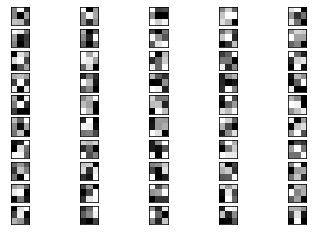

1088/1088 [==============================] - 9s 8ms/sample - loss: 2.7977 - acc: 0.1121 - val_loss: 2.8206 - val_acc: 0.1250
Epoch 2/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.5060 - acc: 0.1979
 Calculating Gradient for Epoch  2

 Visualizing the kernels for Layer 5 of the Model for Epoch  2


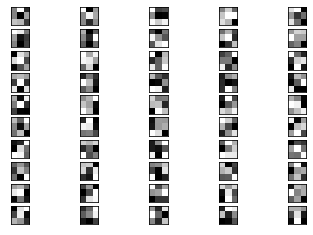

1088/1088 [==============================] - 6s 5ms/sample - loss: 2.5227 - acc: 0.1921 - val_loss: 2.8027 - val_acc: 0.1140
Epoch 3/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.3459 - acc: 0.2583
 Calculating Gradient for Epoch  3

 Visualizing the kernels for Layer 5 of the Model for Epoch  3


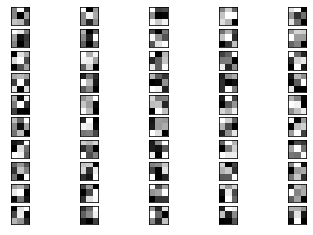

1088/1088 [==============================] - 5s 5ms/sample - loss: 2.3493 - acc: 0.2592 - val_loss: 2.7985 - val_acc: 0.0956
Epoch 4/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.1954 - acc: 0.3063
 Calculating Gradient for Epoch  4

 Visualizing the kernels for Layer 5 of the Model for Epoch  4


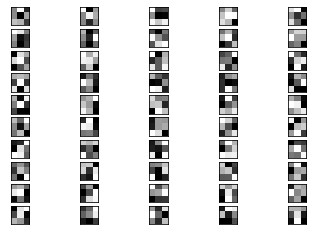

1088/1088 [==============================] - 6s 5ms/sample - loss: 2.1978 - acc: 0.3006 - val_loss: 2.8202 - val_acc: 0.0551
Shape of the Captured Gradient Array : (4, 16)


In [0]:
# Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
from matplotlib import pyplot

np.random.seed(1000)
    
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=5, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(5, input_shape=(224*224*3,)))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epoch_gradient = []
epoch_count = 0

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      print("\n","Calculating Gradient for Epoch ",(epoch+1))
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)

      # Visualize the Kernels for Layer 5 of the Model
      print("\n","Visualizing the kernels for Layer 5 of the Model for Epoch ",(epoch+1))  
      # retrieve weights from the second hidden layer
      filters, biases = model.layers[4].get_weights()
      # normalize filter values to 0-1 so we can visualize them
      f_min, f_max = filters.min(), filters.max()
      filters = (filters - f_min) / (f_max - f_min)
      # plot all the filters
      # n_filters = outgoing filters
      n_filters, ix = 10, 1 
      for i in range(n_filters):
      	# get the filter
      	f = filters[:, :, :, i]
      	# Range of incoming filters
      	for j in range(5):
      		# specify subplot and turn of axis
      		ax = pyplot.subplot(10, 5, ix)
      		ax.set_xticks([])
      		ax.set_yticks([])
      		# plot filter channel in grayscale
      		pyplot.imshow(f[:, :, j], cmap='gray')
      		ix += 1
      # show the figure
      pyplot.show()
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])

# Convert to a array
gradient = np.asarray(epoch_gradient)
print("Shape of the Captured Gradient Array :",gradient.shape)

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(biases)

conv2d_3 (3, 3, 3, 5)
conv2d_4 (3, 3, 5, 10)
conv2d_5 (3, 3, 10, 5)


# Gradient Calculation using tf.grandienttape
https://stackoverflow.com/questions/59447329/how-to-compute-final-gradients-from-multiple-intermediate-gradients-in-neural-ne

In [0]:
%tensorflow_version 1.x
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

In [0]:
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

In [0]:
# Importing dependency
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
from matplotlib import pyplot
import math

# Hyperparameters
batch_size = 128
epochs = 50
#optimizer = Adam(lr=0.001)
#weight_init = RandomNormal()
    
bs = 5
text_len_1 = 772
text_len_2 = 741
embed_size = 300
in_channels = 1

# Create a sequential model
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(2, embed_size),
                                                    dilation_rate=(dilation, 1),
                                                    padding='valid'))
# 1st Convolutional Layer
model.add(Conv2D(filters=5, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(5, input_shape=(224*224*3,)))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True)

with tf.GradientTape() as tape:
    preds = model(x)

grads = tape.gradient(preds, model.trainable_variables)
print(grads)


#model.summary()

# def step(real_x, real_y):
#     with tf.GradientTape() as tape:
#         # Make prediction
#         pred_y = model(x)
#         # Calculate loss
#         model_loss = tf.keras.losses.categorical_crossentropy(real_y, pred_y)
    
#     # Calculate gradients
#     model_gradients = tape.gradient(model_loss, model.trainable_variables)
#     # Update model
#     optimizer.apply_gradients(zip(model_gradients, model.trainable_variables))

# # Training loop
# bat_per_epoch = math.floor(x.shape / batch_size)
# for epoch in range(epochs):
#     print('=', end='')
#     for i in range(bat_per_epoch):
#         n = i*batch_size
#         step(x[n:n+batch_size], y[n:n+batch_size])

# # Calculate accuracy
# # Compile 
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# #model.compile(optimizer=optimizer, loss=tf.keras.losses.categorical_crossentropy, metrics=['acc']) # Compile just for evaluation
# #print('\n', model.evaluate(x_test, y_test, verbose=0)[1])


In [0]:
print(grads.shape)

NameError: ignored

# MobileNetV2 with Statistics
https://stackoverflow.com/questions/58868086/validation-loss-and-validation-accuracy-curve-fluctuating/61360288#61360288

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.utils.layer_utils import count_params

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

#base_model.summary()
trainable_count = count_params(base_model.trainable_weights)
non_trainable_count = count_params(base_model.non_trainable_weights)
print("\n",color.BOLD + '  base_model Statistics !' + color.END)
print("Trainable Parameters :", color.BOLD + str(trainable_count) + color.END)
print("Non Trainable Parameters :", non_trainable_count,"\n")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1025, activation='relu')(x)
x = Dense(1025, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

#model.summary()
trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)
print(color.BOLD + '    model Statistics !' + color.END)
print("Trainable Parameters :", color.BOLD + str(trainable_count) + color.END)
print("Non Trainable Parameters :", non_trainable_count,"\n")

new_weights_added = count_params(model.trainable_weights) - count_params(base_model.trainable_weights)
print("Additional trainable weights added to the model excluding basel model trainable weights :", color.BOLD + str(new_weights_added) + color.END)


   base_model Statistics !
Trainable Parameters : 2223872
Non Trainable Parameters : 34112 

    model Statistics !
Trainable Parameters : 5115398
Non Trainable Parameters : 34112 

Additional trainable weights added to the model excluding basel model trainable weights : 2891526


In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


# Simple CNN + LSTM Model
https://stackoverflow.com/questions/58182882/cnn-lstm-model

In [0]:
# Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, TimeDistributed, LSTM, MaxPooling2D, Flatten, Dense
import numpy as np
from matplotlib import pyplot
import math

model = Sequential()
model.add(TimeDistributed(Conv2D(32, 5, 5,input_shape=(100,6,5,1))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4, 4))))
model.add(Activation('relu'))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(5)))  

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# VGG16 Model Example


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from keras.utils.layer_utils import count_params

resnet50_imagenet_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3),
                           pooling='avg')
resnet50_imagenet_model.output

x = resnet50_imagenet_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(12, activation='softmax')(x)
model = Model(inputs = resnet50_imagenet_model.input, outputs = x)

count=0
#Putting the first 176 of resnet50 layers as trainable false 
for l in resnet50_imagenet_model.layers:
    count=count+1
    if count <=176:
      l.trainable = False

print(count)
#choix de l'algo d'apprentissage
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
20
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________

# Custom tf.keras.layers.RNN
https://stackoverflow.com/questions/58872675/embed-custom-rnn-cell-with-init-that-takes-more-arguments-3-vs-1

In [0]:
%tensorflow_version 1.x
import keras
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import RNN

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)


TensorFlow is already loaded. Please restart the runtime to change versions.


TypeError: ignored

In [0]:
%tensorflow_version 1.x
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN

# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

print("I Ran Successfully")


TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I Ran Successfully


# InceptionResNetV2 Pretrained layer output
https://stackoverflow.com/questions/61418475/how-to-access-the-fully-connected-layer-from-pretrained-models-in-tensorflow

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.utils.layer_utils import count_params
import numpy as np

base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1025, activation='relu')(x)
x = Dense(1025, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

#model.summary()

count = 0
for layer in model.layers:
  print(count,")",layer,"\n")
  count = count + 1

print(model.layers[782].output)  

# To get weights of layer 782
weights = model.layers[782].get_weights()

In [0]:
print(weights)

# Unresloved Question

https://stackoverflow.com/questions/61479030/variational-autoencoder-graph-disconnected-cannot-obtain-value-for-tensor

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Reshape, Concatenate, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import mse, categorical_crossentropy

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var ) * epsilon

beta = 0.5
n_particles = 9 
n_classes = 5 
latent_size = 3 
activation_func = 'relu'

'Network parameters'
input_shape_class = (n_particles, )
input_shape_regress = (3 * n_particles + 2, )
hidden_layer_dim = 512
latent_dim = latent_size * n_particles
'Build encoder'
encoder_inputs_class = tf.keras.Input(shape=input_shape_class)
inputs_class_t = Lambda(lambda x: K.one_hot(K.cast(x, 'int32'), n_classes))(encoder_inputs_class)
inputs_class_t2 = Reshape((n_particles*n_classes,))(inputs_class_t)
encoder_inputs_regress = tf.keras.Input(shape=input_shape_regress)
inputs = Concatenate()([inputs_class_t2, encoder_inputs_regress])
x_1 = Dense(hidden_layer_dim, activation=activation_func)(inputs)
x_2 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_1)
x_3 = Dense(int(hidden_layer_dim/4), activation=activation_func)(x_2)
'Latent space'
z_mean = Dense(latent_dim, activation='linear', name='z_mean')(x_3)
z_log_var = Dense(latent_dim, activation='linear', name='z_log_var')(x_3)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model([encoder_inputs_class, encoder_inputs_regress], [z_mean, z_log_var, z])
encoder.summary()
'Build decoder'
decoder_inputs_latent = tf.keras.Input(shape=(latent_dim,))
decoder_inputs_n_particles = tf.keras.Input(shape=(1,))
decoder_inputs_n_particles_mask = tf.keras.Input(shape=(latent_dim, ))
# Implement mask
masked_latent = Lambda(lambda x: x[0]*x[1])([decoder_inputs_latent, decoder_inputs_n_particles_mask])
x_4 = Dense(int(hidden_layer_dim/4), activation=activation_func)(masked_latent)
x_5 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_4)
x_6 = Dense(hidden_layer_dim, activation=activation_func)(x_5)
outputs_class_t = Dense(n_particles*n_classes, activation='elu')(x_6)
outputs_class_t2 = Reshape((n_particles, n_classes))(outputs_class_t)
decoder_outputs_class = Dense(n_classes, activation='softmax')(outputs_class_t2)
decoder_outputs_regress = Dense(n_particles*3+2, activation='linear')(x_6)
decoder_outputs_n_particles = Dense(1, activation='linear')(x_6)
decoder = Model([decoder_inputs_latent, decoder_inputs_n_particles, decoder_inputs_n_particles_mask], [decoder_outputs_class, decoder_outputs_regress, decoder_outputs_n_particles], name='decoder')
decoder.summary()
'Build autoencoder'
vae_input_1 = tf.keras.Input(shape=input_shape_class, name = 'vae_input_1')
vae_input_2 = tf.keras.Input(shape=input_shape_regress, name = 'vae_input_2')
vae_input_3 = tf.keras.Input(shape=(1,), name = 'vae_input_3')
vae_input_4 = tf.keras.Input(shape=(latent_dim, ), name = 'vae_input_4')
outputs = decoder([encoder([vae_input_1, vae_input_2])[2], vae_input_3, vae_input_4])
print(encoder([vae_input_1, vae_input_2])[2])
vae = Model([vae_input_1, vae_input_2, vae_input_3, vae_input_4], outputs, name='bvae')
vae.summary()
'Calculate loss'
n_particles_loss = mse(decoder_inputs_n_particles, outputs[2])
classification_loss = categorical_crossentropy(inputs_class_t, outputs[0])
regression_loss = mse(encoder_inputs_regress, outputs[1])
reconstruction_loss = 100*K.mean(n_particles_loss) + K.mean(regression_loss)
reconstruction_loss = 100*K.mean(n_particles_loss) + 10*K.mean(classification_loss) + K.mean(regression_loss)
kl_loss = -0.5 * K.sum((1+z_log_var-K.square(z_mean)-K.exp(z_log_var)), axis=-1)
vae_loss = K.mean((1-beta) * reconstruction_loss + beta * kl_loss)
print(encoder([vae_input_1, vae_input_2])[2])
print(vae_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9)]          0                                            
__________________________________________________________________________________________________
lambda_26 (Lambda)              (None, 9, 5)         0           input_1[0][0]                    
__________________________________________________________________________________________________
reshape_26 (Reshape)            (None, 45)           0           lambda_26[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 29)]         0                                            
______________________________________________________________________________________________

ValueError: ignored

# Model.fit error
https://stackoverflow.com/questions/61469811/list-index-out-of-range-while-training-with-model-fit

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


IndexError: ignored

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 70.96%
Saved model to disk


# keras_efficientnets

Build keras_efficientnets, evaluate the model, save the model (**model.save & model.save_weights**) and load the model (**model.load_model & model.load_weights**).

https://stackoverflow.com/questions/61493605/keras-model-containing-efficientnet-submodel-cant-load-weights-any-keras-appli

In [0]:
!pip install keras_efficientnets

## Build keras_efficientnets, evaluate the model, save & load the model (**model.save & model.load_model**)

In [0]:
%tensorflow_version 1.x
import keras
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Flatten
from keras_efficientnets import EfficientNetB0

model = EfficientNetB0(input_shape=(224, 224, 3), classes=1000, include_top=False, weights='imagenet')

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(20, activation='relu')(x)
x = Dense(17, activation='softmax')(x)
model = Model(inputs = model.input, outputs = x)

# summarize model
#model.summary()

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, batch_size=64, epochs= 1, verbose=1, validation_split=0.2, shuffle=True)

# evaluate the model
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

Train on 1088 samples, validate on 272 samples
Epoch 1/1
1088/1088 [==============================] - 374s 344ms/step - loss: 1.3614 - accuracy: 0.6939 - val_loss: 1.1502 - val_accuracy: 0.6618
accuracy: 71.47%
Saved model to disk


In [0]:
%tensorflow_version 1.x
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5py')

# summarize model
#model.summary()

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# evaluate the model
score = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 71.47%


## Save & Load the model (**model.save_weights & model.load_weights**) 

In [0]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 71.47%


# Loading pretrained encoder from tf_hub
https://stackoverflow.com/questions/61492221/problem-with-loading-pretrained-universal-sentence-encoder

In [0]:
%tensorflow_version 2.x
import tensorflow_hub as hub
# enabling the pretrained model for trainig our custom model using tensorflow hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.load(module_url)

# creating a method for embedding and will using method for every input layer 
def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature='default', as_dict=True)["default"]

# Function loop having session

https://stackoverflow.com/questions/61498647/how-to-call-a-function-written-in-tensorflow

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

def fun():
    x = tf.constant(1.0)  

    with tf.Session().as_default() as sess:
         y = x * x
         print(y.eval()) 

In [0]:
for x in range(6):
  fun()

1.0
1.0
1.0
1.0
1.0
1.0


# Lazy Adam Optimizer - 30/04/2020
https://stackoverflow.com/questions/61521845/how-to-use-lazy-adam-optimizer-in-tensorflow-2-0-0

In [8]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa

import numpy as np
from numpy import loadtxt

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer=tfa.optimizers.LazyAdam(), metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
# compile model
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2.2.0-rc3
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.82%


# model.predict - 30/04/2020
https://stackoverflow.com/questions/61521598/keras-prediction-model-how-to-get-the-first-element

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa

import numpy as np
from numpy import loadtxt

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer=tfa.optimizers.LazyAdam(), metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
# compile model
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# predict on the test
test_predictions = model.predict(X_test)
print(type(test_predictions))

# Convert test_predictions >= 0.5 to 1 else 0
result = np.where(test_predictions >= 0.5, 1, 0)
print(type(result))

2.2.0-rc3
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.82%


# Unable to recreate the issue - 30/04/2020
https://stackoverflow.com/questions/61516675/keras-model-with-layout-errorthe-graph-couldnt-be-sorted-in-topological-order

In [0]:
%tensorflow_version 1.x
import keras
from keras import  Input, Model
from keras.layers import Embedding, Concatenate, TimeDistributed, Flatten, Bidirectional, LSTM, Activation, Dropout, Dense

bi_gram_input = Input(shape=(100, 26))
bi_gram_embedding = Embedding(4289, 20, input_shape=(100, 26))(bi_gram_input)

tri_gram_input = Input(shape=(100, 25))
tri_gram_embedding = Embedding(32828, 20, input_shape=(100, 25))(tri_gram_input)

qua_gram_input = Input(shape=(100, 24))
qua_gram_embedding = Embedding(123773, 20, input_shape=(100, 24))(qua_gram_input)

final_added = Concatenate(axis=-2)([bi_gram_embedding, tri_gram_embedding, qua_gram_embedding])
flattened = TimeDistributed(Flatten(input_shape=(75, 20)))(final_added)
lstm1 = Bidirectional(LSTM(512, return_sequences=True))(flattened)
dropout1 = Dropout(0.3)(lstm1)
dense1 = TimeDistributed(Dense(56))(dropout1)
dropout2 = Dropout(0.2)(dense1)
dense2 = TimeDistributed(Dense(4))(dropout2)
output = Activation('softmax')(dense2)

model = Model([bi_gram_input, tri_gram_input, qua_gram_input], output)